In [67]:
import pandas as pd

In [101]:
df = pd.read_csv('/content/sample_data/State_of_data_BR_2023_Kaggle - df_survey_2023.csv', header=0)



##Procurar Colunas

In [109]:
# Para 'PCD'
pcd_columns = [col for col in df.columns if 'pcd' in col.lower()]
print("Colunas relacionadas a PCD:", pcd_columns)

# Para 'Região'
regiao_columns = [col for col in df.columns if 'regi' in col.lower()]
print("Colunas relacionadas a Região:", regiao_columns)

#profissional
profissionais_columns = [col for col in df.columns if 'prof' in col.lower()]
print("Colunas relacionadas a Profissionais:", profissionais_columns)

cargo_columns = [col for col in df.columns if 'cargo' in col.lower()]
print("Colunas relacionadas a Cargo:", cargo_columns)

nivel_ensino_columns = [col for col in df.columns if 'nivel' in col.lower()]
print("Colunas relacionadas a Nível de Ensino:", nivel_ensino_columns)

experiencia_pcd_columns = [col for col in df.columns if 'experi' in col.lower()]
print("Colunas relacionadas a Experiência de PCD:", experiencia_pcd_columns)

situacao_trabalho_columns = [col for col in df.columns if 'situa' in col.lower()]
print("Colunas relacionadas a Situação de Trabalho:", situacao_trabalho_columns)

genero_columns = [col for col in df.columns if 'genero' in col.lower()]
print("Colunas relacionadas a Gênero:", genero_columns)

etnia_columns = [col for col in df.columns if 'etnia' in col.lower()]
print("Colunas relacionadas a Etnia:", etnia_columns)

homens_columns = [col for col in df.columns if 'traba' in col.lower()]
print("Colunas relacionadas a Home:", homens_columns)

nomes_columns = [col for col in df.columns if 'nom' in col.lower()]
print("Colunas relacionadas a Nomes:", nomes_columns)

hibridos_columns = [col for col in df.columns if 'hibrid' in col.lower()]
print("Colunas relacionadas a Hibridos:", hibridos_columns)

modalidades_columns = [col for col in df.columns if 'modelo' in col.lower()]
print("Colunas relacionadas a Modalidades:", modalidades_columns)

Colunas relacionadas a PCD: ["('P1_d ', 'PCD')", "('P1_e_4 ', 'Experiencia prejudicada devido ao fato de ser PCD')"]
Colunas relacionadas a Região: ["('P1_i_2 ', 'Regiao onde mora')", "('P1_k ', 'Regiao de origem')"]
Colunas relacionadas a Profissionais: ["('P1_e ', 'experiencia_profissional_prejudicada')", "('P1_e_1 ', 'Não acredito que minha experiência profissional seja afetada')", "('P2_o_7 ', 'Plano de carreira e oportunidades de crescimento profissional')"]
Colunas relacionadas a Cargo: ["('P2_e ', 'Cargo como Gestor')", "('P2_f ', 'Cargo Atual')", "('P3_b ', 'Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?')", "('P4_a ', 'Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?')"]
Colunas relacionadas a Nível de Ensino: ["('P1_l ', 'Nivel de Ensino')", "('P2_g ', 'Nivel')"]
Colunas relacionadas a Experiência de PCD: ["('P1_e ', 'experiencia_profissional_prejudicada')", 

In [99]:
# Etapa 1: simplificar os nomes das colunas
df.columns = [col[1] if isinstance(col, tuple) else col for col in df.columns]

#selecionar apenas as colunas relevantes para as questões
colunas_interesse = [
    'Idade',
    'Faixa idade',
    'Genero',
    'Cor/raca/etnia',
    'PCD',
    'Região',
    'Cargo',
    'Nível de escolaridade',
    'situação de trabalho',
    'experiencia_profissional_prejudicada'
]

colunas_existentes = [col for col in colunas_interesse if col in df.columns]

df_base = df[colunas_existentes].copy()

df_base.columns = [col.strip().lower().replace(" ", "_") for col in df_base.columns]

valores_unicos = {col: df_base[col].dropna().unique() for col in df_base.columns}

faltantes = df_base.isnull().sum().sort_values(ascending=False)

df_base.shape, df_base.dtypes, valores_unicos, faltantes


((5293, 0), Series([], dtype: object), {}, Series([], dtype: float64))

##4.1. Distribuição Etária por Profissão e Fatores Demográficos:
**A)Por Gênero**


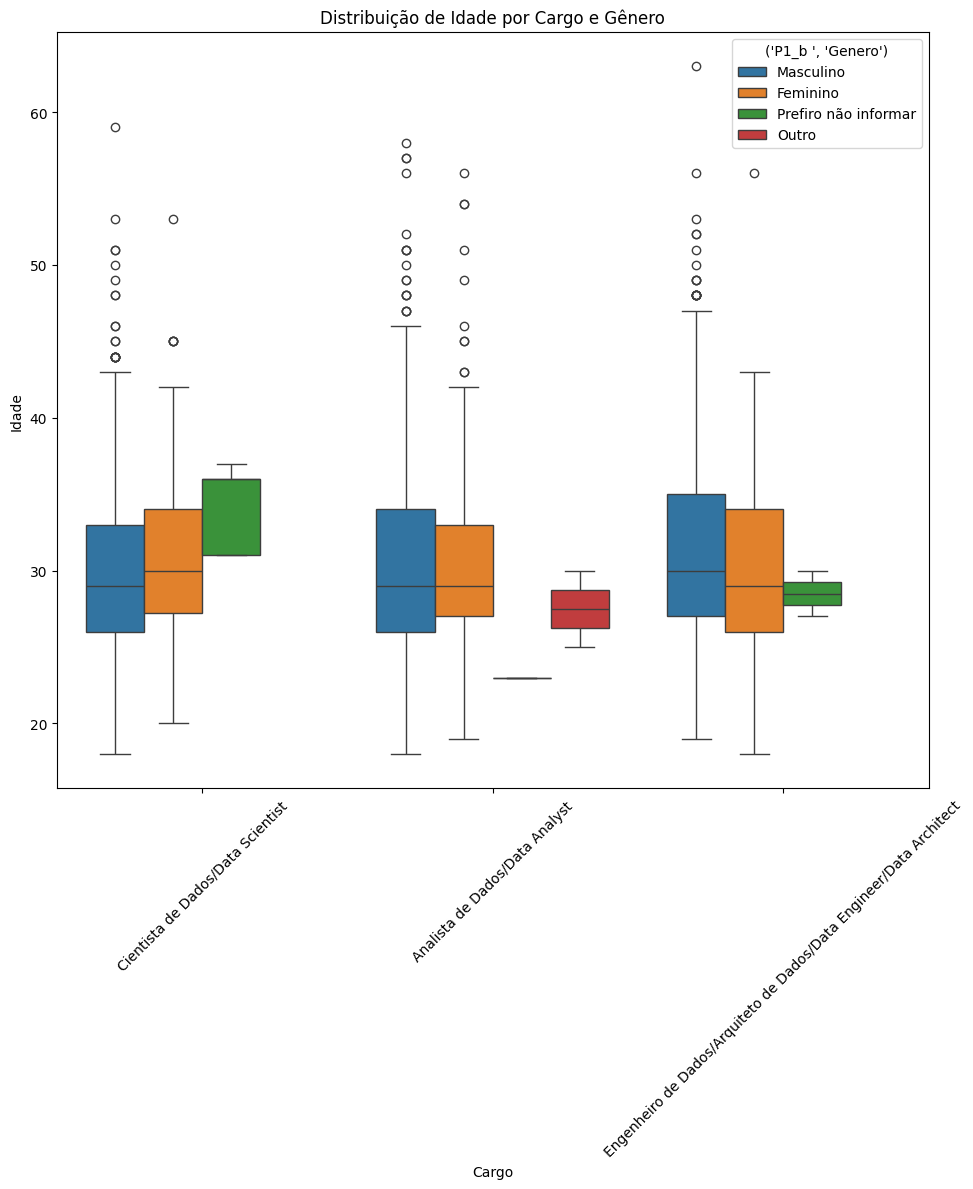

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define os cargos de interesse para análise
cargos_principais = [
    'Cientista de Dados/Data Scientist',
    'Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect',
    'Analista de Dados/Data Analyst'
]

# Filtra o DataFrame para conter apenas os cargos selecionados
df_filtrado = df[df['(\'P2_f \', \'Cargo Atual\')'].isin(cargos_principais)]

# Define o tamanho da figura
plt.figure(figsize=(10, 12))

# Cria boxplots da distribuição de idade por cargo, separados por gênero
sns.boxplot(
    data=df_filtrado,
    x='(\'P2_f \', \'Cargo Atual\')',  # Eixo X: cargos
    y='(\'P1_a \', \'Idade\')',        # Eixo Y: idade
    hue='(\'P1_b \', \'Genero\')'     # Separação por gênero
)

# Configurações do gráfico
plt.title('Distribuição de Idade por Cargo e Gênero')
plt.xlabel('Cargo')
plt.ylabel('Idade')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibe o gráfico
plt.show()


**B) Por Etnia**

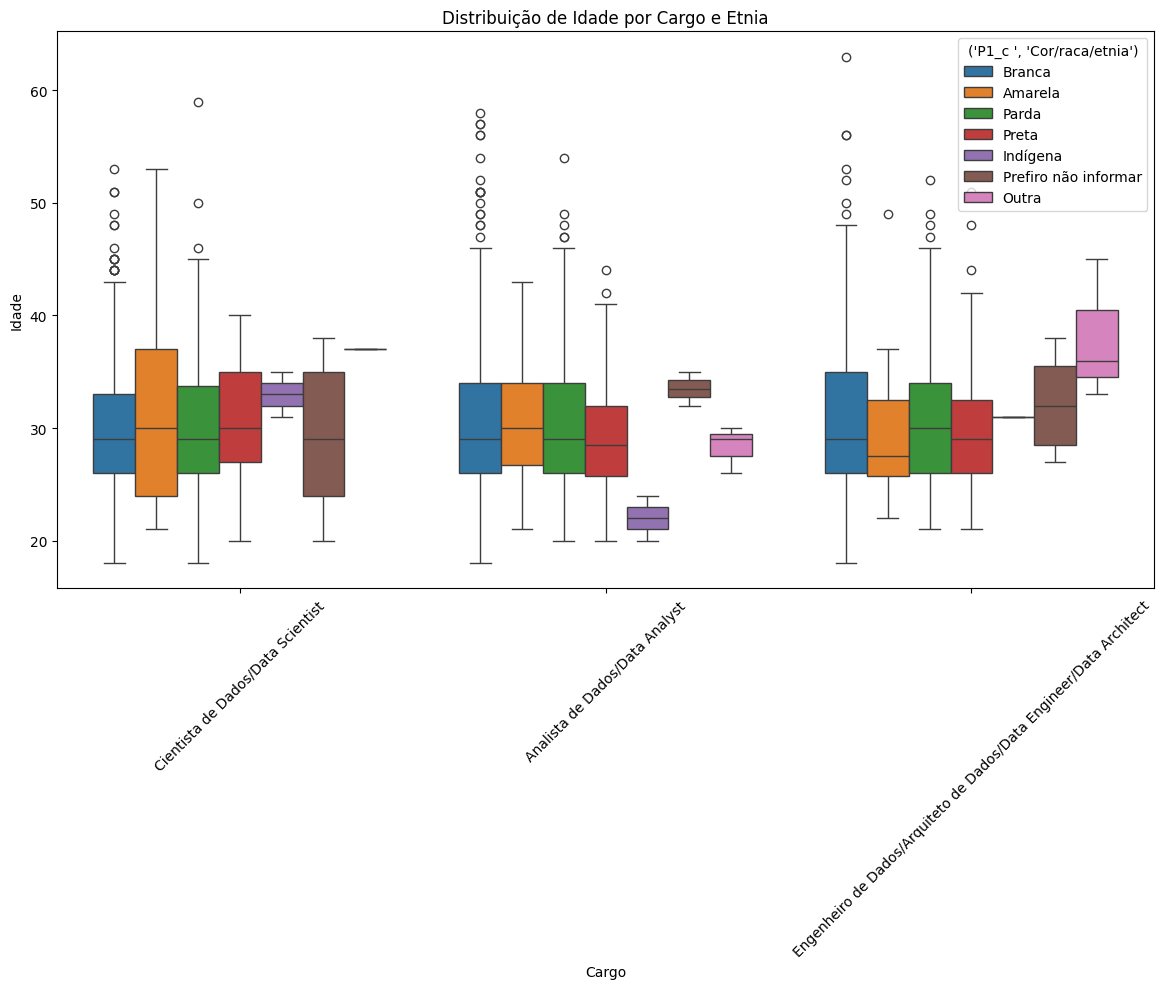

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define o tamanho da figura
plt.figure(figsize=(12, 10))

# Cria um boxplot mostrando a distribuição de idades por cargo, separados por etnia
sns.boxplot(
    data=df_filtrado,
    x='(\'P2_f \', \'Cargo Atual\')',   # Eixo X: cargos
    y='(\'P1_a \', \'Idade\')',         # Eixo Y: idade
    hue='(\'P1_c \', \'Cor/raca/etnia\')'  # Cores diferentes para cada etnia
)

# Título e rótulos dos eixos
plt.title('Distribuição de Idade por Cargo e Etnia')
plt.xlabel('Cargo')
plt.ylabel('Idade')

# Rotaciona os rótulos do eixo X para melhor leitura
plt.xticks(rotation=45)

# Ajusta o layout para evitar sobreposição de elementos
plt.tight_layout()

# Exibe o gráfico
plt.show()


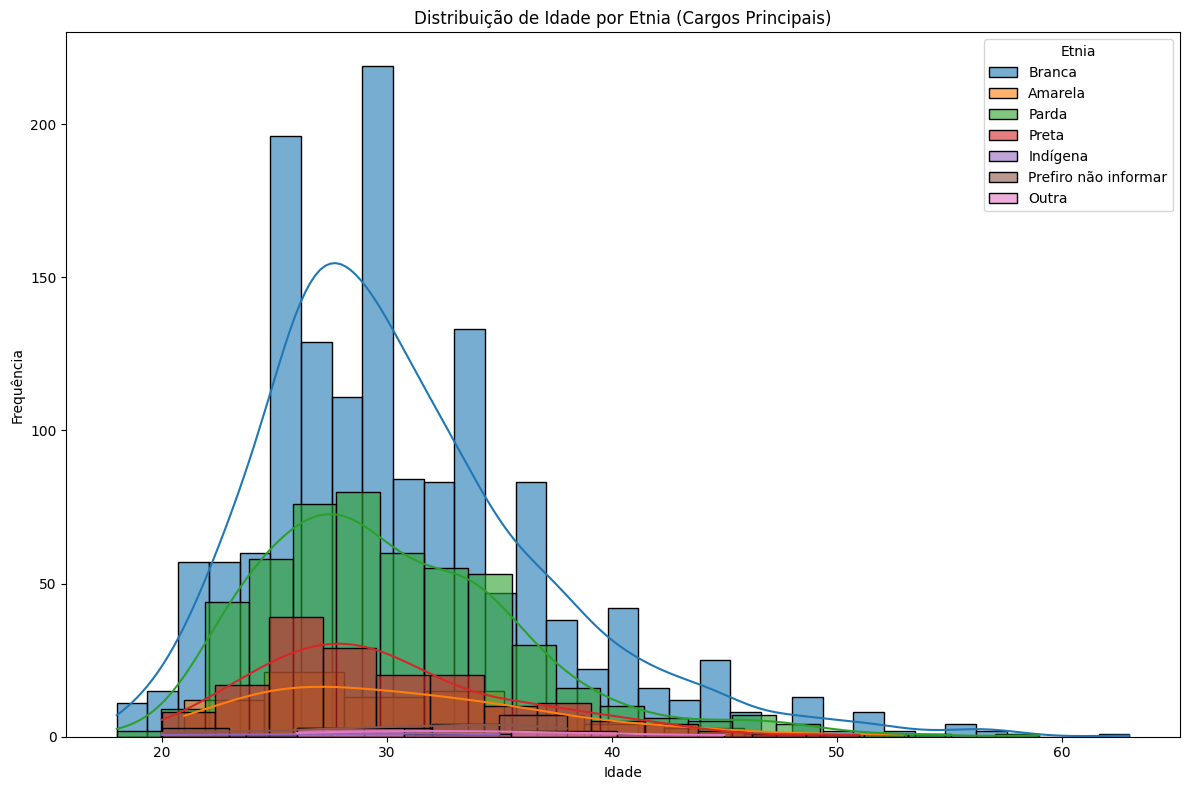

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Obtém as etnias únicas (sem valores nulos) presentes no DataFrame filtrado
etnias = df_filtrado['(\'P1_c \', \'Cor/raca/etnia\')'].dropna().unique()

# Define o tamanho da figura
plt.figure(figsize=(12, 8))

# Para cada etnia, plota um histograma da distribuição de idades
for ethnicity in etnias:
    sns.histplot(
        data=df_filtrado[df_filtrado['(\'P1_c \', \'Cor/raca/etnia\')'] == ethnicity],
        x='(\'P1_a \', \'Idade\')',
        kde=True,       # Adiciona a curva de densidade
        label=ethnicity,
        alpha=0.6       # Define transparência para facilitar sobreposição
    )

# Configurações do gráfico
plt.title('Distribuição de Idade por Etnia (Cargos Principais)')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.legend(title='Etnia')
plt.tight_layout()

# Exibe o gráfico
plt.show()


##4.2. Concentração de Profissionais PcD por Região
Calcular a proporção de profissionais com deficiência em cada região do país.


Visualizar a distribuição geográfica.


Analisar disparidades regionais.


In [34]:
pip install folium


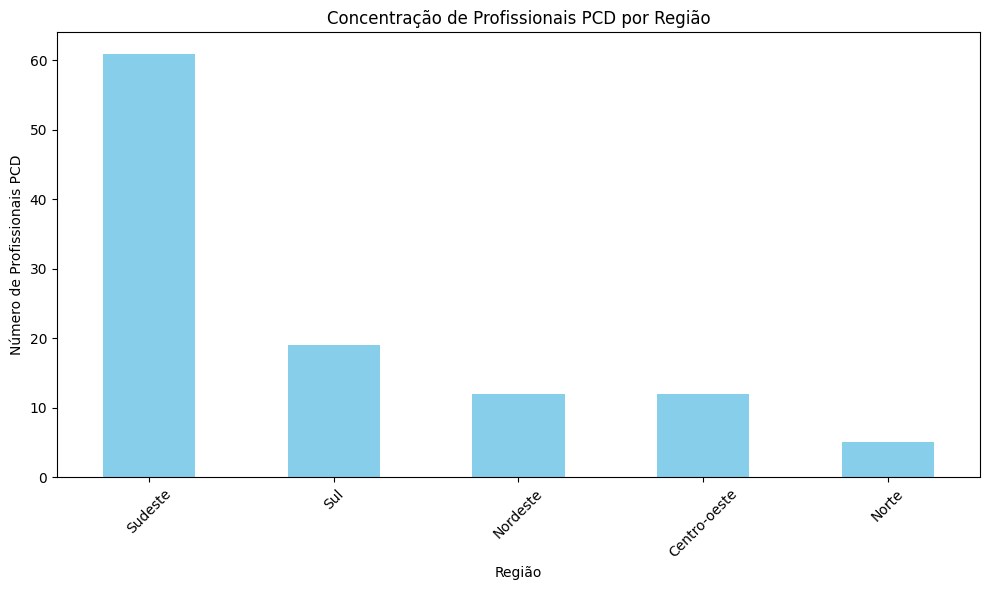

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtra os respondentes que se identificaram como PCD (Pessoa com Deficiência)
df_pcd = df[df["('P1_d ', 'PCD')"].str.strip().str.lower() == "sim"]

# Conta o número de PCDs por região
pcd_counts = df_pcd["('P1_i_2 ', 'Regiao onde mora')"].value_counts()

# Define o tamanho da figura
plt.figure(figsize=(10, 6))

# Cria um gráfico de barras com a contagem de PCD por região
pcd_counts.plot(kind='bar', color='skyblue')

# Adiciona título e rótulos aos eixos
plt.title("Concentração de Profissionais PCD por Região")
plt.xlabel("Região")
plt.ylabel("Número de Profissionais PCD")

# Rotaciona os nomes das regiões no eixo X para melhor visualização
plt.xticks(rotation=45)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico
plt.show()



In [119]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Filtra apenas os profissionais que se identificaram como PCD
df_pcd = df[df["('P1_d ', 'PCD')"].str.strip().str.lower() == "sim"]

# Conta o número de PCDs por região
region_counts = df_pcd["('P1_i_2 ', 'Regiao onde mora')"].value_counts()
print("Contagem de PCD por região:")
print(region_counts)

# Coordenadas aproximadas do centro de cada região do Brasil
region_coords = {
    'Norte': [-3.415, -55.856],
    'Nordeste': [-10.0, -42.0],
    'Centro-Oeste': [-15.780, -54.930],
    'Sudeste': [-22.908, -43.196],
    'Sul': [-29.690, -53.814]
}

# Cria um mapa centralizado no Brasil
brasil_map = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Prepara os dados de calor: [latitude, longitude, intensidade]
heat_data = []
for region, count in region_counts.items():
    coord = region_coords.get(region.strip().title())  # Busca coordenadas da região
    if coord:
        heat_data.append([coord[0], coord[1], count])

# Adiciona o mapa de calor ao mapa do Brasil
HeatMap(heat_data, radius=50, max_zoom=7).add_to(brasil_map)

# Exibe o mapa interativo (no Jupyter/Colab)
brasil_map


Contagem de PCD por região:
('P1_i_2 ', 'Regiao onde mora')
Sudeste         61
Sul             19
Nordeste        12
Centro-oeste    12
Norte            5
Name: count, dtype: int64


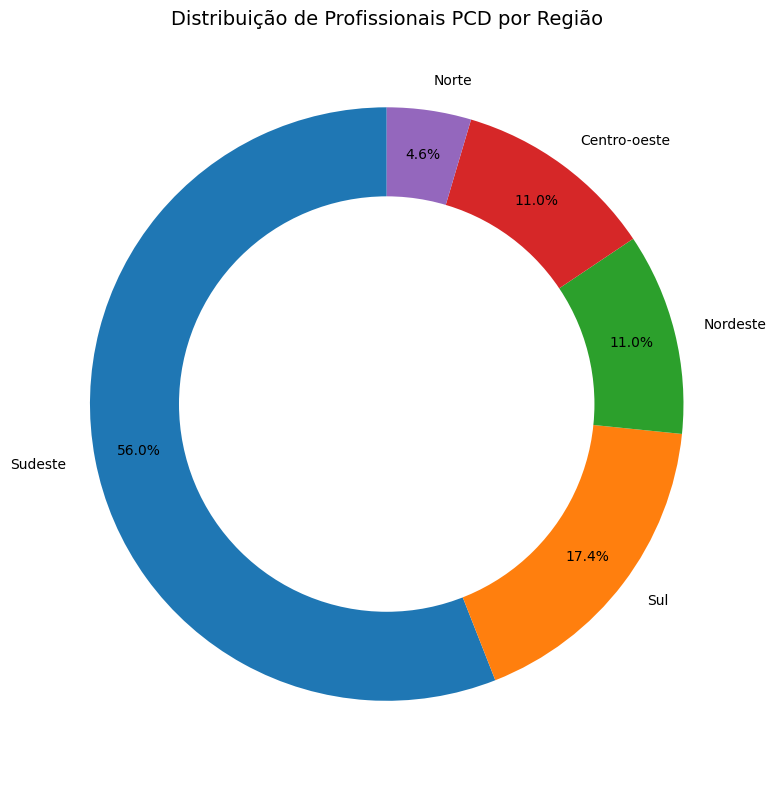

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtra apenas os respondentes que se identificaram como PCD (Pessoa com Deficiência)
df_pcd = df[df["('P1_d ', 'PCD')"].str.strip().str.lower() == "sim"]

# Conta quantas pessoas PCD existem por região
pcd_counts = df_pcd["('P1_i_2 ', 'Regiao onde mora')"].value_counts()

# Define o tamanho da figura
plt.figure(figsize=(8, 8))

# Cria um gráfico de pizza com porcentagens e nomes das regiões
patches, texts, autotexts = plt.pie(
    pcd_counts,
    labels=pcd_counts.index,       # Rótulos: regiões
    autopct='%1.1f%%',             # Mostra porcentagens com uma casa decimal
    startangle=90,                 # Começa o gráfico a partir do topo
    pctdistance=0.85               # Distância da porcentagem até o centro
)

# Adiciona título ao gráfico
plt.title("Distribuição de Profissionais PCD por Região", fontsize=14)

# Adiciona um círculo branco no centro para formar o estilo "rosquinha"
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Ajusta o layout para não cortar elementos
plt.tight_layout()

# Exibe o gráfico
plt.show()


##4.3. Nível de Ensino por Cargo e Região


Contagem por Cargo:
Cargo
analista de dados/data analyst                                         888
cientista de dados/data scientist                                      671
engenheiro de dados/arquiteto de dados/data engineer/data architect    666
desenvolvedor/ engenheiro de software/ analista de sistemas            105
engenheiro de machine learning/ml engineer/ai engineer                  72
Name: count, dtype: int64


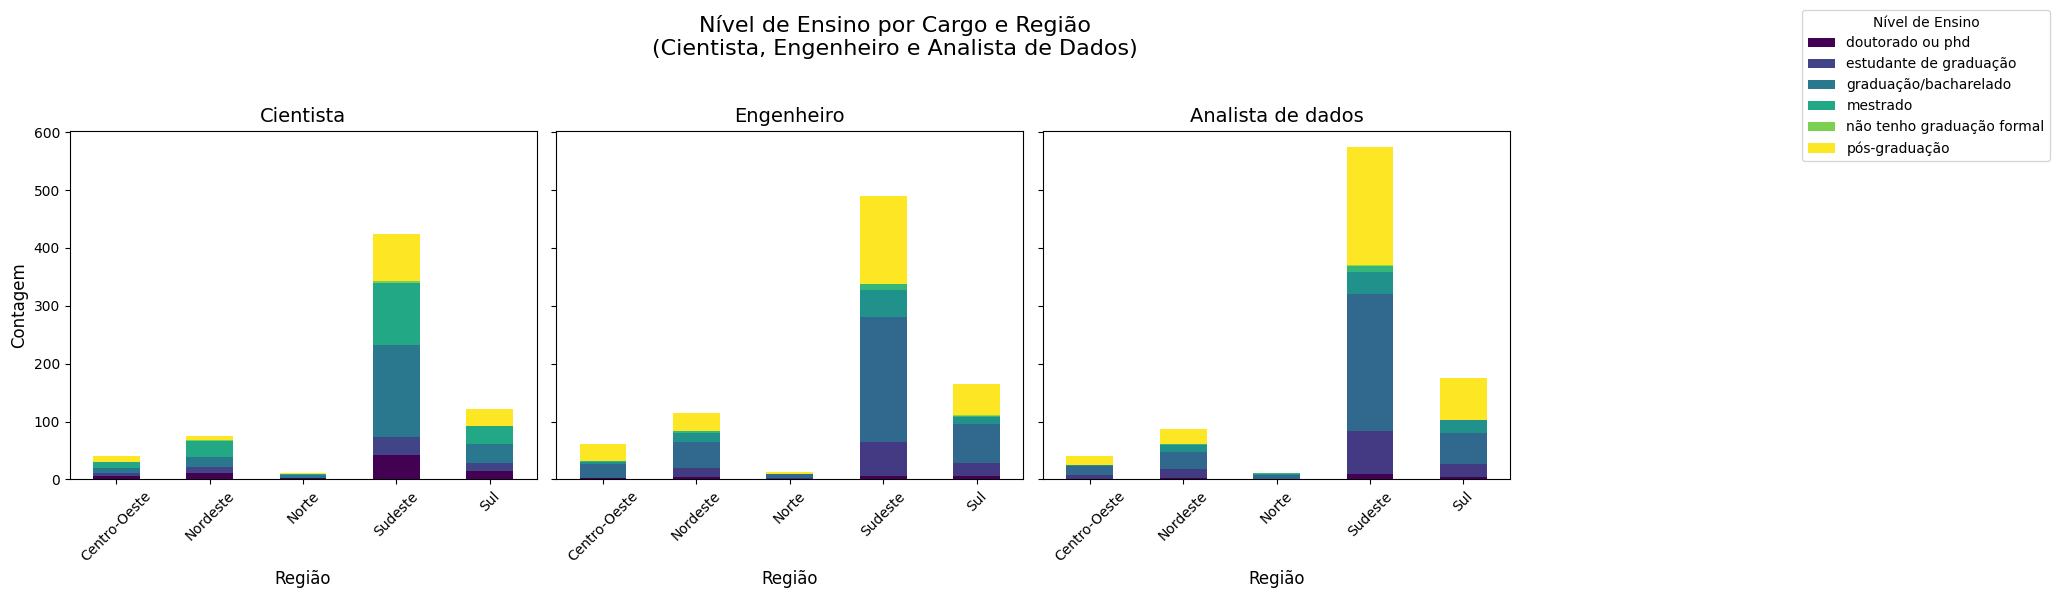

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# Define as colunas de interesse: cargo, nível de ensino e região
colunas = [
    "('P2_f ', 'Cargo Atual')",
    "('P1_l ', 'Nivel de Ensino')",
    "('P1_i_2 ', 'Regiao onde mora')"
]

# Cria um novo DataFrame com essas colunas, removendo valores ausentes
df_filtered = df[colunas].dropna().copy()

# Renomeia as colunas para facilitar o uso
df_filtered.columns = ['Cargo', 'Nivel_Esino', 'Regiao']

# Padroniza os textos: remove espaços extras, ajusta caixa
df_filtered['Cargo'] = df_filtered['Cargo'].str.strip().str.lower()
df_filtered['Nivel_Esino'] = df_filtered['Nivel_Esino'].str.strip().str.lower()
df_filtered['Regiao'] = df_filtered['Regiao'].str.strip().str.title()

# Define os cargos de interesse
cargos_interesse = ['cientista', 'engenheiro', 'analista de dados']

# Filtra o DataFrame para manter apenas os registros com cargos de interesse
df_target = df_filtered[df_filtered['Cargo'].apply(
    lambda x: any(chave in x for chave in cargos_interesse))
]

# Mostra contagem de cargos no console
print("Contagem por Cargo:")
print(df_target['Cargo'].value_counts())

# Define a quantidade de gráficos (um para cada cargo)
cargo_list = cargos_interesse
num_cargos = len(cargo_list)
fig, axs = plt.subplots(1, num_cargos, figsize=(6*num_cargos, 6), sharey=True)

# Gera um gráfico empilhado para cada cargo, mostrando região x nível de ensino
for i, cargo in enumerate(cargo_list):
    df_cargo = df_target[df_target['Cargo'].str.contains(cargo)]

    # Cria tabela dinâmica com contagem por região e nível de ensino
    pivot = df_cargo.groupby(['Regiao', 'Nivel_Esino']).size().unstack(fill_value=0)
    pivot = pivot.sort_index()

    # Plota o gráfico de barras empilhadas
    pivot.plot(kind='bar', stacked=True, ax=axs[i], colormap='viridis', legend=False)
    axs[i].set_title(cargo.capitalize(), fontsize=14)
    axs[i].set_xlabel("Região", fontsize=12)
    axs[i].set_ylabel("Contagem", fontsize=12)
    axs[i].tick_params(axis='x', rotation=45)

# Adiciona legenda única fora dos subgráficos
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Nível de Ensino", bbox_to_anchor=(1, 1), loc='upper left')

# Título geral e ajuste do layout
plt.suptitle("Nível de Ensino por Cargo e Região\n(Cientista, Engenheiro e Analista de Dados)", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.85, 0.95])
plt.show()


##4.4 Situação de Trabalho - Genero e Etnia

<ipython-input-116-98a1d13d01dd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


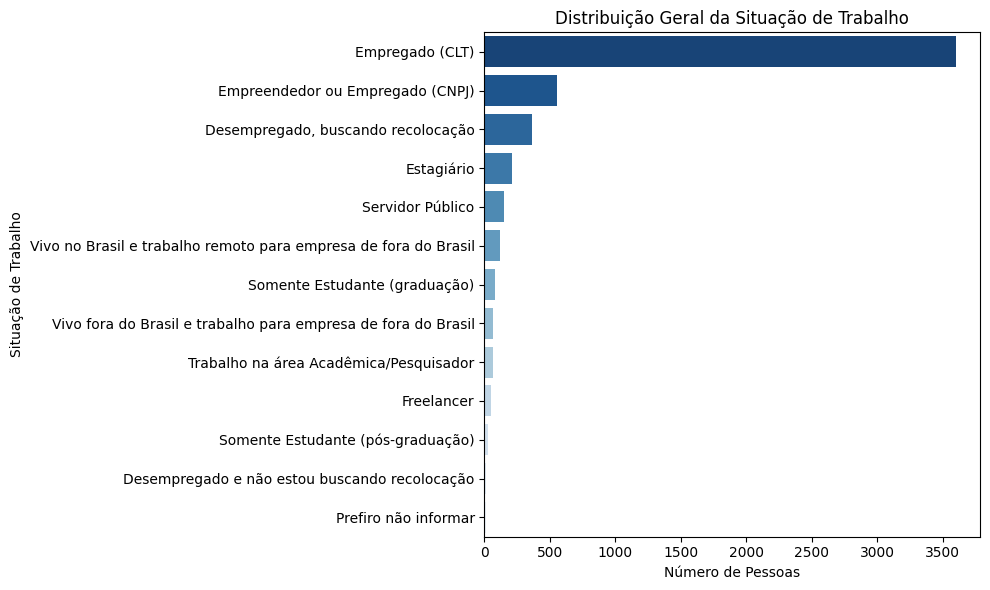

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define o tamanho da figura do gráfico
plt.figure(figsize=(10, 6))

# Gráfico de barras horizontais com contagem de cada situação de trabalho
sns.countplot(
    data=df,
    y="('P2_a ', 'Qual sua situação atual de trabalho?')",  # Eixo y: situação de trabalho
    order=df["('P2_a ', 'Qual sua situação atual de trabalho?')"].value_counts().index,  # Ordena por frequência
    palette='Blues_r'  # Paleta de cores em tons de azul (invertida)
)

# Título e rótulos dos eixos
plt.title("Distribuição Geral da Situação de Trabalho")
plt.xlabel("Número de Pessoas")
plt.ylabel("Situação de Trabalho")

# Ajuste automático para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico
plt.show()


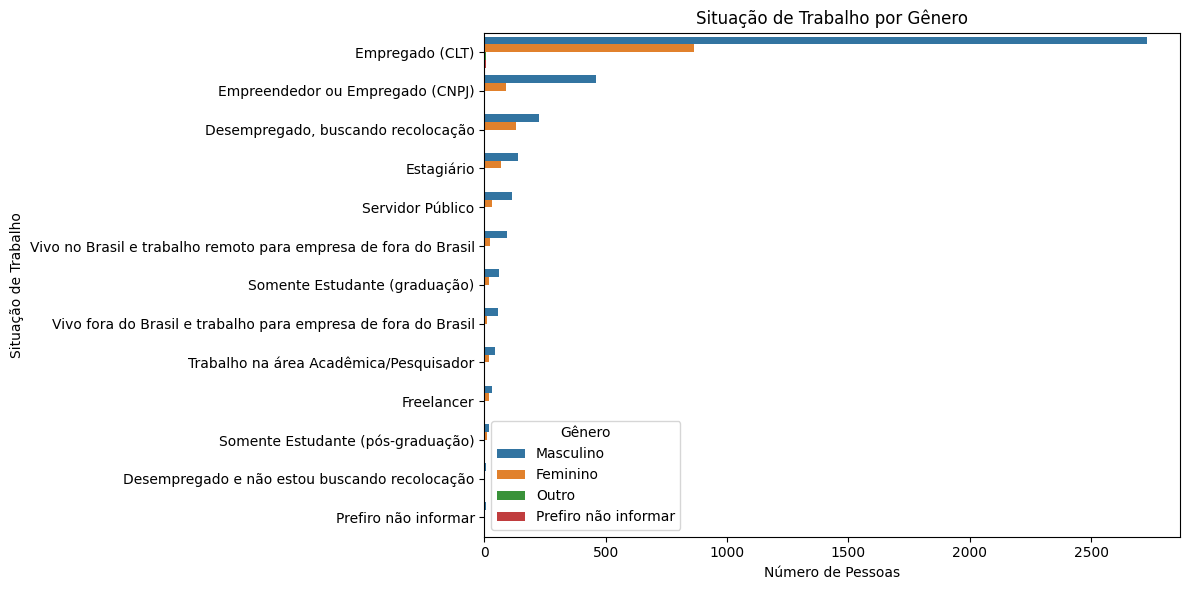

In [115]:
# Define o tamanho da figura
plt.figure(figsize=(12, 6))

# Gráfico de barras horizontais com contagem de situações de trabalho, separadas por gênero
sns.countplot(
    data=df,
    y="('P2_a ', 'Qual sua situação atual de trabalho?')",  # Eixo y: situação de trabalho
    hue="('P1_b ', 'Genero')",  # Agrupamento por gênero
    order=df["('P2_a ', 'Qual sua situação atual de trabalho?')"].value_counts().index  # Ordena pela frequência
)

# Título e rótulos dos eixos
plt.title("Situação de Trabalho por Gênero")
plt.xlabel("Número de Pessoas")
plt.ylabel("Situação de Trabalho")

# Legenda com título
plt.legend(title="Gênero")

# Ajuste automático do layout
plt.tight_layout()

# Exibe o gráfico
plt.show()


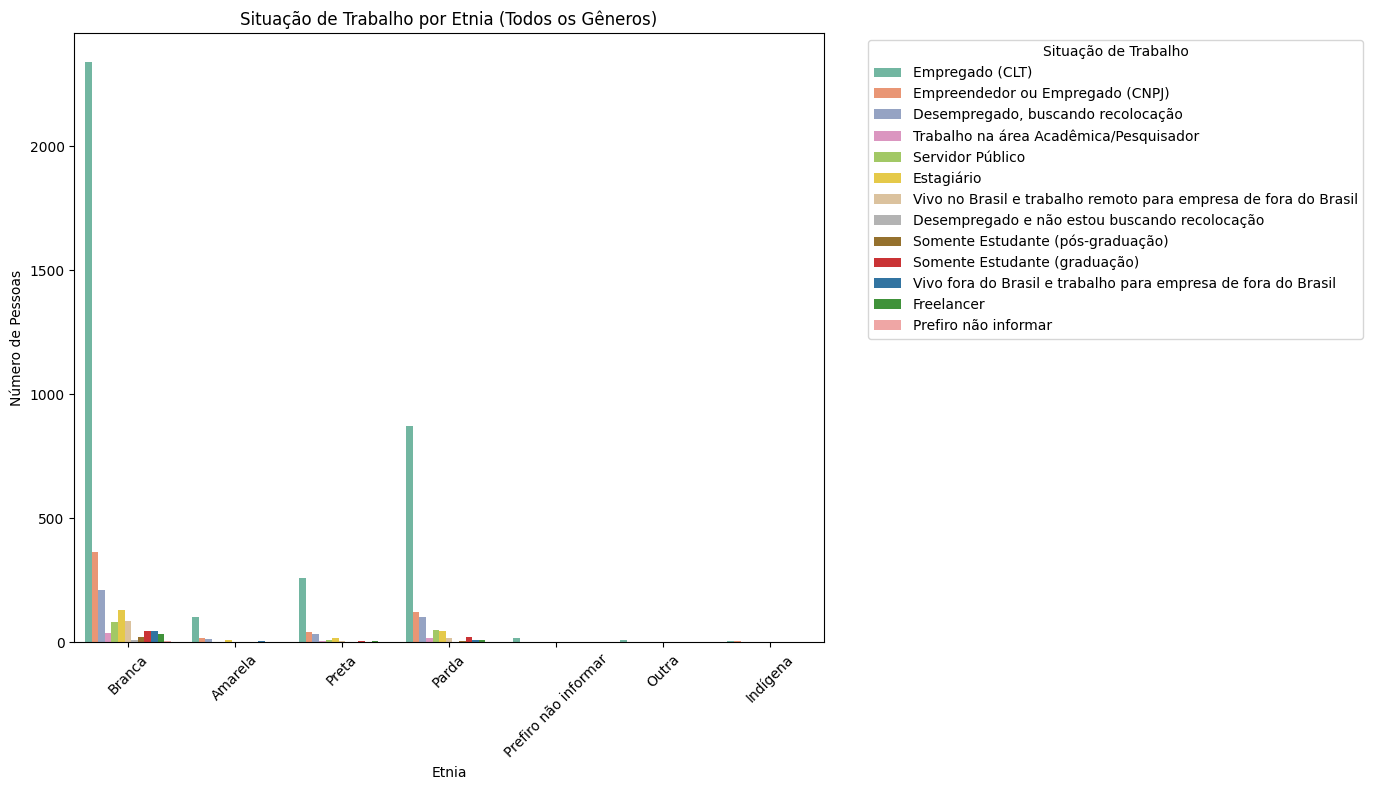

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Paleta de cores personalizada para o gráfico
custom_palette = [
    "#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854",
    "#ffd92f", "#e5c494", "#b3b3b3", "#a6761d", "#e31a1c",
    "#1f78b4", "#33a02c", "#fb9a99"
]

# Define o tamanho da figura do gráfico
plt.figure(figsize=(14, 8))

# Gráfico de contagem com separação por etnia (eixo x) e situação de trabalho (cores)
sns.countplot(
    data=df,
    x="('P1_c ', 'Cor/raca/etnia')",  # Eixo x: etnia declarada
    hue="('P2_a ', 'Qual sua situação atual de trabalho?')",  # Agrupamento: situação de trabalho
    palette=custom_palette  # Aplica paleta de cores personalizada
)

# Configurações de título e rótulos
plt.title("Situação de Trabalho por Etnia (Todos os Gêneros)")
plt.xlabel("Etnia")
plt.ylabel("Número de Pessoas")

# Posiciona a legenda fora do gráfico
plt.legend(title="Situação de Trabalho", bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotaciona os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Ajuste do layout para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico
plt.show()


##**4.5**. Experiência de Profissionais PcD por Região


In [91]:
print(df_exp)


Empty DataFrame
Columns: [('P1_d ', 'PCD'), ('P1_i_2 ', 'Regiao onde mora'), ('P2_i ', 'Quanto tempo de experiência na área de dados você tem?'), ('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?'), PCD, Regiao, Experiencia_Dados, Experiencia_TI]
Index: []


In [89]:
print(df_exp[["Experiencia_Dados", "Experiencia_TI"]].describe())


       Experiencia_Dados  Experiencia_TI
count                0.0             0.0
mean                 NaN             NaN
std                  NaN             NaN
min                  NaN             NaN
25%                  NaN             NaN
50%                  NaN             NaN
75%                  NaN             NaN
max                  NaN             NaN


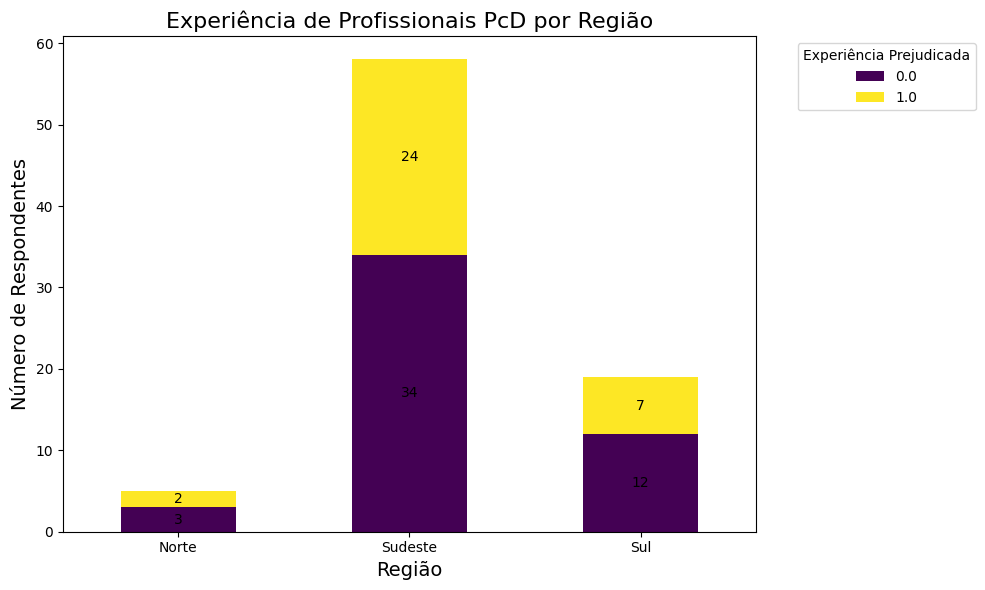

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

cols = [
    "('P1_e_4 ', 'Experiencia prejudicada devido ao fato de ser PCD')",
    "('P1_d ', 'PCD')",
    "('P1_i_2 ', 'Regiao onde mora')"
]


df_exp = df[cols].copy()

df_exp["Experiencia"] = df_exp["('P1_e_4 ', 'Experiencia prejudicada devido ao fato de ser PCD')"].astype(str).str.strip().str.lower()
df_exp["PCD"] = df_exp["('P1_d ', 'PCD')"].astype(str).str.strip().str.lower()
df_exp["Regiao"] = df_exp["('P1_i_2 ', 'Regiao onde mora')"].astype(str).str.strip().str.title()

# Remove registros que se tornaram 'nan'
df_exp = df_exp[
    (df_exp["Experiencia"] != 'nan') &
    (df_exp["PCD"] != 'nan') &
    (df_exp["Regiao"] != 'nan')
].copy()

# Filtra para profissionais PCD e regiões de interesse: Norte, Sul e Sudeste
df_exp = df_exp[
    (df_exp["PCD"] == "sim") &
    (df_exp["Regiao"].isin(["Norte", "Sul", "Sudeste"]))
].copy()

# 2. Converte as respostas de experiência de 0/1 para "não"/"sim", se necessário
df_exp["Experiencia"] = df_exp["Experiencia"].replace({'1': 'sim', '0': 'não'})


pivot_table = df_exp.pivot_table(
    index="Regiao",
    columns="Experiencia",
    aggfunc='size',
    fill_value=0
)

fig, ax = plt.subplots(figsize=(10, 6))
pivot_table.plot(kind='bar',
                 stacked=True,
                 colormap='viridis',
                 ax=ax)

plt.title("Experiência de Profissionais PcD por Região", fontsize=16)
plt.xlabel("Região", fontsize=14)
plt.ylabel("Número de Respondentes", fontsize=14)
plt.xticks(rotation=0)

plt.legend(title="Experiência Prejudicada", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        x_center = p.get_x() + p.get_width() / 2.0
        y_center = p.get_y() + height / 2.0
        ax.text(x_center, y_center, f'{int(height)}', ha='center', va='center', fontsize=10, color='black')

plt.show()


Valores únicos de PCD: ['não' 'sim' 'prefiro não informar']
Valores únicos de Atitude: ['vou procurar outra oportunidade no modelo 100% remoto'
 'vou procurar outra oportunidade no modelo híbrido ou remoto'
 'vou aceitar e retornar ao modelo 100% presencial']
Tabela Cruzada:
PCD                                                  não  \
Atitude                                                    
vou aceitar e retornar ao modelo 100% presencial    1171   
vou procurar outra oportunidade no modelo 100% ...  1436   
vou procurar outra oportunidade no modelo híbri...  2027   

PCD                                                 prefiro não informar  sim  
Atitude                                                                        
vou aceitar e retornar ao modelo 100% presencial                       5   22  
vou procurar outra oportunidade no modelo 100% ...                     9   42  
vou procurar outra oportunidade no modelo híbri...                     8   33  


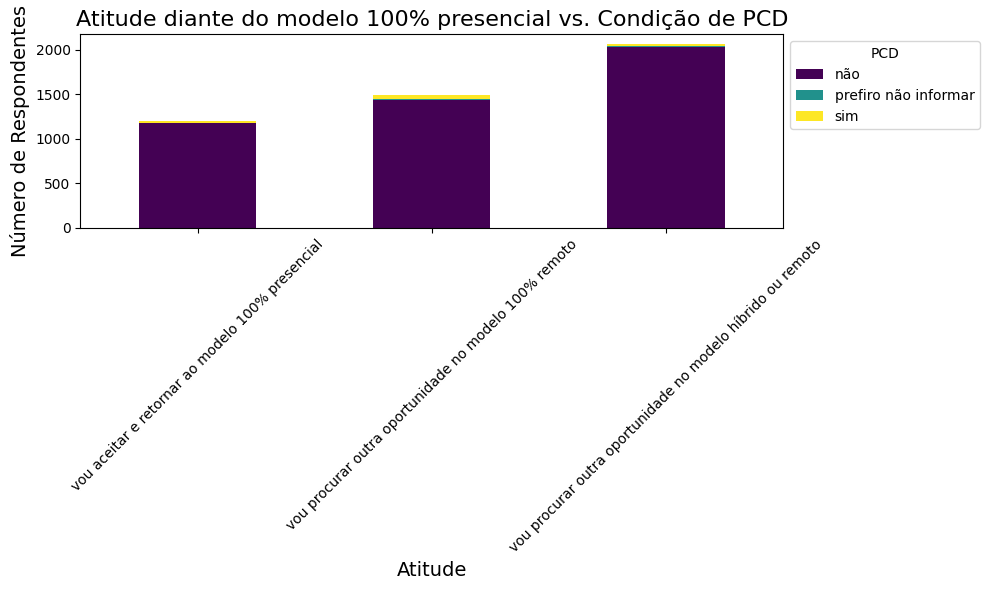

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Seleção de colunas de interesse
cols = [
    "('P1_d ', 'PCD')",
    "('P2_t ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')"
]

# Cria uma cópia dos dados com as colunas selecionadas
df_att = df[cols].copy()

# 2. Padronização dos valores: remova espaços extras e converte para minúsculas
df_att["PCD"] = df_att["('P1_d ', 'PCD')"].astype(str).str.strip().str.lower()
df_att["Atitude"] = df_att["('P2_t ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')"] \
    .astype(str).str.strip().str.lower()

# 3. Remover registros sem resposta para a atitude (por exemplo, onde é "nan")
df_att = df_att[df_att["Atitude"] != "nan"]

# Visualize os valores únicos para conferir se estão padronizados (opcional)
print("Valores únicos de PCD:", df_att["PCD"].unique())
print("Valores únicos de Atitude:", df_att["Atitude"].unique())

# 4. Criação da tabela de contingência
crosstab = pd.crosstab(df_att["Atitude"], df_att["PCD"])
print("Tabela Cruzada:")
print(crosstab)

# 5. Plotagem do gráfico de barras empilhadas
crosstab.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title("Atitude diante do modelo 100% presencial vs. Condição de PCD", fontsize=16)
plt.xlabel("Atitude", fontsize=14)
plt.ylabel("Número de Respondentes", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="PCD", bbox_to_anchor=(1, 1), loc="upper left")
plt.tight_layout()
plt.show()


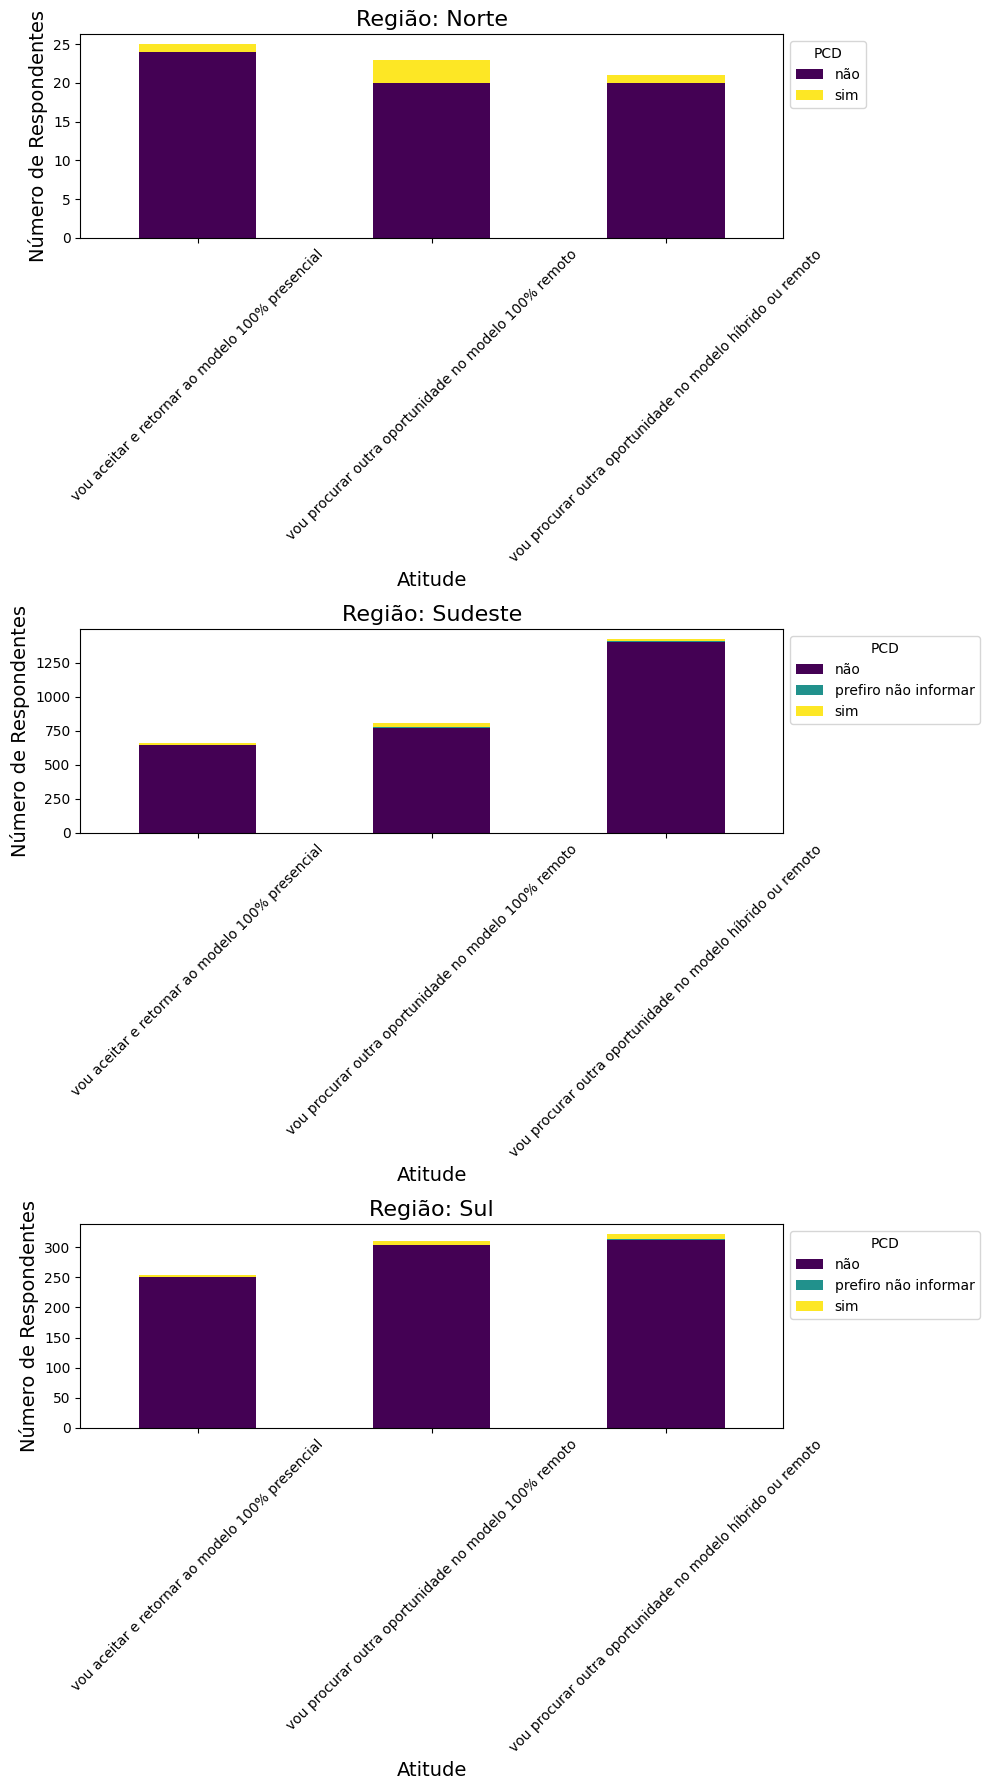

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# Seleção das colunas relevantes: PCD, atitude frente ao modelo 100% presencial e região.
cols = [
    "('P1_d ', 'PCD')",
    "('P2_t ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')",
    "('P1_i_2 ', 'Regiao onde mora')"
]

# Criação de um novo DataFrame apenas com as colunas selecionadas.
df_att = df[cols].copy()

# Padronização da coluna "PCD": remove espaços, coloca em minúsculas.
df_att["PCD"] = df_att["('P1_d ', 'PCD')"].astype(str).str.strip().str.lower()

# Padronização da coluna "Atitude": remove espaços, coloca em minúsculas.
df_att["Atitude"] = df_att["('P2_t ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')"]\
    .astype(str).str.strip().str.lower()

# Padronização da coluna "Região": remove espaços e coloca em formato título (ex: 'Sul').
df_att["Regiao"] = df_att["('P1_i_2 ', 'Regiao onde mora')"].astype(str).str.strip().str.title()

# Remove respostas ausentes (nan) na coluna "Atitude".
df_att = df_att[df_att["Atitude"] != "nan"]

# Filtra dados apenas das regiões de interesse.
df_att = df_att[df_att["Regiao"].isin(["Norte", "Sudeste", "Sul"])]

# Lista de regiões para análise e número de subgráficos.
regioes = ["Norte", "Sudeste", "Sul"]
n_regioes = len(regioes)

# Criação de uma grade de subplots (um para cada região).
fig, axes = plt.subplots(n_regioes, 1, figsize=(10, 6 * n_regioes), squeeze=False)

# Loop pelas regiões para gerar os gráficos de barras empilhadas.
for i, reg in enumerate(regioes):
    sub_df = df_att[df_att["Regiao"] == reg]  # Filtra por região

    # Tabela cruzada entre atitude e se é PCD ou não.
    crosstab = pd.crosstab(sub_df["Atitude"], sub_df["PCD"])

    # Plota gráfico de barras empilhadas com colormap 'viridis'.
    crosstab.plot(kind='bar', stacked=True, colormap='viridis', ax=axes[i, 0])
    axes[i, 0].set_title(f"Região: {reg}", fontsize=16)
    axes[i, 0].set_xlabel("Atitude", fontsize=14)
    axes[i, 0].set_ylabel("Número de Respondentes", fontsize=14)
    axes[i, 0].tick_params(axis='x', rotation=45)
    axes[i, 0].legend(title="PCD", bbox_to_anchor=(1, 1), loc="upper left")

# Ajuste do layout final e exibição do gráfico.
plt.tight_layout()
plt.show()
